# 신경망 학습
<b>- 학습</b>: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것<br>
<b>- 지표</b>: 손실함수
<br>
<b>- 학습의 목표</b>: 함수의 기울기를 활용하는 방법을 통해 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것
<br><br>LaTeX 참고:https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

## 4.1 데이터에서 학습한다
: 가중치 매개변수의 값을 데이터를 보고 자동으로 결정

- 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도
- 딥러닝 = 종단간 기계학습(end-to-end machine learning)

<b>종간간 기계학습(end-to-end machine learning): 데이터(입력)에서 모표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻</b><br><br>
<b>범용능력: 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 올바르게 풀어내는 능력</b><br><br>
<b>오버피팅: 한 데이터셋에만 지나치게 최적화된 상태</b>

## 4.2 손실 함수
: 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못' 하느냐를 나타냄

### 손실함수 1) 오차제곱합 Sum of Squares for error, SSE
$$ E  =  \frac{1}{2}\sum_{k}^{}\, (y_k - t_k)^2 $$ 

$y_k$: 신경망의 출력(신경망이 추정한 값; 소프트맥스 함수의 출력)<br>
$t_k$: 정답 레이블<br>
$k$: 데이터의 차원 수

In [7]:
import numpy as np
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]#정답 = 2
assert len(y)==len(t)
print(len(y))

10


In [31]:
#오차제곱합(내가 만듦)
def sum_squares_error2(y,t):
    e = sum((y_i - t_i)**2 for y_i,t_i in zip(y,t))
    return 1/2*e

In [32]:
#오차제곱합(책에 나옴)
def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [55]:
t = [0,0,1,0,0,0,0,0,0,0]#정답 = 2
#예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = np.zeros(10)
y[2] = 0.6
print("y:",y)
print("SSE",sum_squares_error(np.array(y),np.array(t)))
sse1 = sum_squares_error(np.array(y),np.array(t))
print("SSE2",sum_squares_error2(np.array(y),np.array(t)))

y: [0.  0.  0.6 0.  0.  0.  0.  0.  0.  0. ]
SSE 0.08000000000000002
SSE2 0.08000000000000002


In [56]:
#예2: '7'일 확률이 가장 높다고 추정함(0.6)
y = np.zeros(10)
y[7] = 0.6
print("y:",y)
print("SSE",sum_squares_error(np.array(y),np.array(t)))
sse2 = sum_squares_error(np.array(y),np.array(t))
print("SSE2",sum_squares_error2(np.array(y),np.array(t)))

y: [0.  0.  0.  0.  0.  0.  0.  0.6 0.  0. ]
SSE 0.6799999999999999
SSE2 0.6799999999999999


오차제곱합 기준으로 첫번째 추정 결과(예1)가 오차가 더 작아 정답에 더 가까울 것으로 판단할 수 있음

### 손실함수 2) 교차 엔트로피 오차 Cross Entropy Error CEE
$$ E  =  -\sum_{k}^{}\, t_k \log y_k $$ 
$\log$: 밑이 $e$인 자연로그($\log_e$)<br>
$y_k$: 신경망의 출력<br>
$t_k$: 원-핫 인코딩된 정답 레이블(정답에 해당하는 인덱스의 원소만 1, 나머지는 0)
<br>


자연로그 $y$ = $\log_e x$의 그래프

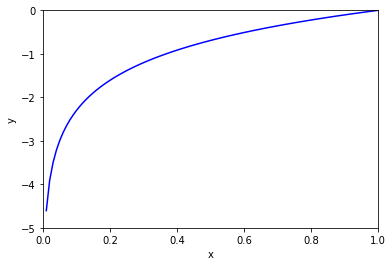

In [50]:
#자연로그 그래프 출력
import matplotlib.pyplot as plt
x = [0.01*(x+1) for x in range(100)]
#print("X",x)
y = np.log(x)
plt.plot(x,y,'b-')
plt.xlim(0,1)
plt.ylim(-5,0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

그래프에서 보듯이 x가 1일 때엔 y는 0이 되고, x가 0에 가까워질수록 y는 점점 작아짐

In [51]:
def cross_entropy_error2(y,t):#직접 작성
    return -sum(t*np.log(y))

In [52]:
def cross_entropy_error(y,t):#직접 작성
    delta = 1e-7#log에 0이 입력되지 않도록 아주 작은 값 생성
    return -sum(t*np.log(y+delta))

np.log()함수에 0을 일벽하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 됨

In [61]:
t = np.zeros(10)
t[2] = 1#2가 정답
y= np.zeros(10)
y[2]=0.6#2를 정답으로 예측
cross_entropy_error(y,t)
cee1 = cross_entropy_error(y,t)
print(cee1)

0.510825457099338


In [62]:
t = np.zeros(10)
t[2] = 1#2가 정답
y= np.zeros(10)
y[7]=0.6#7를 정답으로 예측
cross_entropy_error(y,t)
cee2 = cross_entropy_error(y,t)
print(cee2)

16.11809565095832


In [66]:
#오차제곱합과 교차엔트로피오차 비교
print("같은 오류를 냈을 때>>")
print("맞았을 때 오차 제곱합:",sse1)
print("틀렸을 때 오차 제곱합:",sse2)
print("오차제곱합 차이:",sse2-sse1)
print("\n맞았을 때 교차 엔트로피 오차:",cee1)
print("틀렸을 때 교차 엔트로피 오차:",cee2)
print("교차 엔트로피 오차 차이:",cee2-cee1)
print("\n교차엔트로피 오차의 오차 크기가 더 큼")

같은 오류를 냈을 때>>
맞았을 때 오차 제곱합: 0.08000000000000002
틀렸을 때 오차 제곱합: 0.6799999999999999
오차제곱합 차이: 0.5999999999999999

맞았을 때 교차 엔트로피 오차: 0.510825457099338
틀렸을 때 교차 엔트로피 오차: 16.11809565095832
교차 엔트로피 오차 차이: 15.607270193858982

교차엔트로피 오차의 오차 크기가 더 큼


### 4.2.4 미니배치 학습
- 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법<br>
(교차 엔트로피 오차)<br>
$$ E = -\frac{1}{N}\sum_{n}^{}\sum_{k}^{}\, t_{nk} \log y_{nk} $$ <br>
- 데이터가 $N$개라면, $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미
- $y_{nk}$는 신경망의 출력, $t_{nk}$는 정답레이블
- $N$으로 나눔으로써 '평균 손실 함수'를 구하는 것이다

<b>수많은 데이터를 대상으로 일일이 손실함수를 계산하는 것은 현실적이지 않다.<br>
따라서, 데이터 일부를 추려 전체의 '근사치'로 이용하는데 훈련 데이터로부터 일부만 골라 학습할 때 이 일부를 '미니배치mini-batch'라고 한다.</b><br>
가령, 60,000장의 훈련 데이터 중에서 100자을 무작위로 뽑아 그 100장만을 사용하여 학습하는 방법이 미니배치 학습의 예다.

In [68]:
#MNIST 데이터셋 읽어오기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train),(x_test,t_test)=load_mnist(normalize=True, one_hot_label=True)#정규화, 원-핫 인코딩
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [69]:
train_size = x_train.shape[0]#60,000
train_size

60000

In [70]:
batch_size = 10#무작위로 10장만 빼냄

In [72]:
batch_mask = np.random.choice(train_size,batch_size)#60,000 미만의 수 중에서 무작위로 10개를 골라낸다
print(batch_mask)
print(len(batch_mask))

[41164  6476 13962 33373 50689 31790 53489 56518 37742 57336]
10


In [73]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [74]:
x_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

손실함수도 이 미니배치로 계산

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현

In [78]:
t.shape

(10,)

In [80]:
t.size

10

In [215]:
def cross_entropy_error(y,t):#배치 데이터 지원하는 교차 엔트로피 오차
    if y.ndim == 1:#y가 1차원일 때(데이터 한 개당 교차엔트로피오차를 구하는 경우)
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [81]:
y.shape

(10,)

### 4.2.5 왜 손실 함수를 설정하는가?('정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유)
신경망 학습에서는 최적의 매개변수(가중치,편향)을 탐색할 때 손실함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.
<br>이 때 매개변수의 미분(기울기)을 계산하고, 그 미분 값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복한다<br>
<br>
<b>손실함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실함수가 어떻게 변하나'라는 의미</b>
<br>미분값이 0이면 갱신은 거기서 멈춘다<br><br>
#### <i>신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다.</i>
#### <i>정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.</i>
<br>
정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이 되는 이유:<br>
- 정확도가 개선된다 하더라도 불연속적인 값으로 바뀌어 버림<br>
- 손실 함수를 지표로 삼으면 연속적으로 변화

## 4.3 수치 미분: 기울기(경사)
미분: 한 순간의 변화량
$$\frac{df(x)}{dx}  =  \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$$
<br> x의 '작은 변화'가 함수$f(x)$를 얼마나 변화시키느냐를 의미<br>

In [86]:
#수치미분(전방차분) 구현
def numerical_diff(f,x):
    h = 10e-50#아주 작은 값으로 ㅓㄹ정
    return (f(x+h)-f(x))/h

In [94]:
#예시
def f(x):
    return x**2 + x
numerical_diff(f,2)#해석학적 미분: 5

0.0

개선해야 하는 문제:
1. 반올림 오차 문제: 너무 작은 값을 이용하여 생기는 문제다.<br>
개선 방법: h값 키우기
2. 함수 f의 차분 관련 문제: 진정한 미분과 수치미분 사이의 유의미한 차이가 존재한다<br>
개선방법: 전방차분이 아닌 <b>중심차분</b> 활용하기
<br><br>
    - 해석적 미분: 진정한 미분
    - 수치 미분: 근삿값

In [96]:
h1 = 10e-50#전방
h2 = 1e-4#중앙
h1<h2#h로 더 큰 값 활용

True

#### 중심차분(중앙차분)
$$\frac{df(x)}{dx}  =  \lim_{h \to 0}\frac{f(x+h)-f(x-h)}{2h}$$

In [98]:
#중심차분(중앙차분) 구현
def numerical_diff(f,x):
    h = 1e-4#h2
    return (f(x+h)-f(x-h))/2*h

In [100]:
#예시:비슷하게 나옴
def f(x):
    return x**2 + x
numerical_diff(f,2)#해석학적 미분: 5

5.000000000006111e-08

In [141]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

$y=0.01x^2 +0.1x$

In [101]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

0.1999999999990898
0.2999999999986347


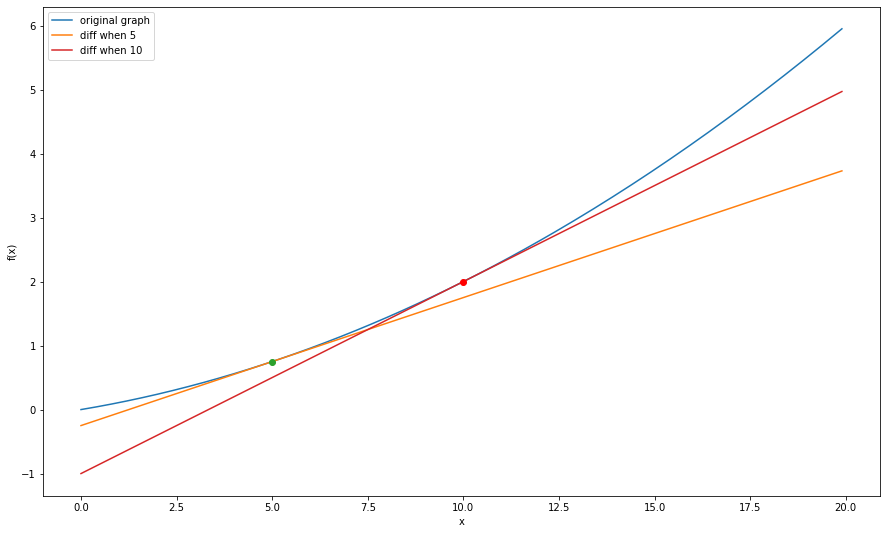

In [171]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
fig= plt.figure(figsize=(15,9))

x = np.arange(0.0, 20.0, 0.1)
x2 = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x2)
tf3 = tangent_line(function_1,10)
y3 = tf3(x)
plt.plot(x, y,label='original graph')
plt.plot(x2, y2,label='diff when 5')
plt.plot(5,function_1(5),'o')
plt.plot(x2,y3,label='diff when 10')
plt.plot(10,function_1(10),'ro') 
plt.legend()
plt.show()

In [153]:
#x=5일 때 이 함수의 미분을 계산
numerical_diff(function_1,10)

2.999999999986347e-09

In [154]:
#x=10일 때 이 함수의 미분을 계산
numerical_diff(function_1,10)

2.999999999986347e-09

### 4.3.3 편미분
$$f(x_0,x_1)=x_0^2 +x_1^2$$

In [173]:
def function_2(x):
    return x[0]**2 + x[1]**2

<br>문제1: $x_0$=3, $x_1$=4일 때,편미분 $\frac{\partial f}{\partial x_0}$를 구하라.

In [175]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [176]:
numerical_diff(function_tmp1,3.0)#해석적 편미분 값:6

6.00000000000378

<br>문제2: $x_0$=3, $x_1$=4일 때,편미분 $\frac{\partial f}{\partial x_1}$를 구하라.

In [178]:
def function_tmp2(x1):
    return 3.0**2.0 +x1*x1

In [179]:
numerical_diff(function_tmp2,4.0)#해석적 편미분 값:8

7.999999999999119

## 4.4 기울기

In [180]:
#편미분 동시 계산
def numerical_gradient(f,x):
    h = 1e-4#0.0001
    grad = np.zeros_like(x)#x와 형상이 같은 배열을 생성(원소는 모두 0)
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산
        x[idx]=tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val#값 복원
    return grad

In [181]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [182]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [183]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

No handles with labels found to put in legend.


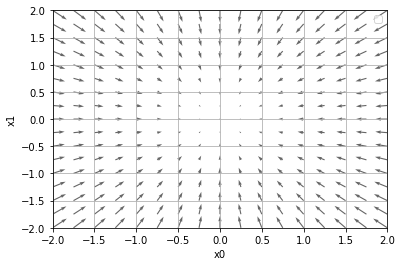

In [235]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

<b>기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향</b>

### 4.4.1 경사법(경사 하강법)
경사법: 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것
<br>최적이란 손실 함수가 최솟갑이 될 때의 매개변수 값<br>
기울기가 0이 될 때: 함수가 극솟값, 최솟값, 또는 안장점(saddle point)이 되는 장소

$$x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}$$
$$x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}$$
<br>
$\eta$는 학습률(매개변수 값을 얼마나 갱신해야 하느냐를 정하는 것

In [187]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):#경사하강법 구현
    x = init_x
    for i in range(step_num):#갱신 반복
        grad = numerical_gradient(f,x)#편미분->함수의 기울기
        x-=lr*grad
    return x

문제: 경사법으로 $f(x_0,x_1)=x_0^2 +x_1^2$의 최솟값을 구하라

In [189]:
def function_2(x):
    return x[0]**2+x[1]**2
init_x = np.array([-3.0,4.0])#초기값
gradient_descent(function_2, init_x=init_x, lr = 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

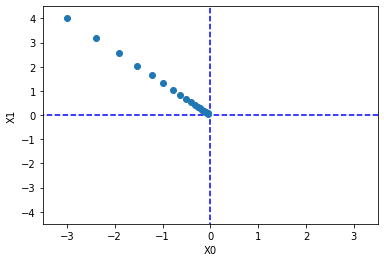

In [237]:

def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f, x)
        
        return grad
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

(0,0)에 가까워지는 것을 알 수 있다

In [194]:
#학습률이 너무 큰 예: lr = 10.0
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x =init_x, lr=10.0, step_num=100)#발산

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [195]:
#학습률이 너무 작은 예: lr = 1e-10
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr=1e-10, step_num=100#갱신 x

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

학습률이 너무 크면, 큰 값으로 발산해버린다<br>
학습률이 너무 작으면, 거의 갱신되지 않은 채 끝나버린다
<br>
학습률 같은 매개변수를 사람이 직접 설정해야 하는 매개변수인 <b>하이퍼파라미터</b>라고 한다.

### 4.4.2 신경망에서의 기울기

가중치: $W$      손실함수: $L$

$$W = \begin{pmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{pmatrix}$$
<br>
$$\frac{\partial L}{\partial W} = \begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}}\\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{pmatrix}$$
$\frac{\partial L}{\partial W}$의 각 원소는 각각의 원소에 관한 편미분이다

In [207]:
#기울기 구하는 코드
import sys, os
sys.path.append(os.pardir)
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a =  np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

class simpleNet:
    def __init__(self):#기울기 초기화
        self.W = np.random.randn(2,3)#정규분포로 초기화
        
    def predict(self,x):#예측
        return np.dot(x,self.W)
    
    def loss(self,x,t):#손실함수 값
        z= self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [210]:
net = simpleNet()
print(net.W)#가중치 매개변수

[[ 1.06013654 -1.51903065  0.32226308]
 [-1.27125475 -0.29456345 -0.3066924 ]]


In [211]:
x = np.array([0.6,0.9])#입력데이터
p = net.predict(x)#입력
print(p)

[-0.50804736 -1.17652549 -0.08266531]


In [212]:
np.argmax(p)

2

In [216]:
t=np.array([0,0,1])
net.loss(x,t)

4.006676123173396

In [218]:
def f(W):
    return net.loss(x,t)

In [219]:
dW = numerical_gradient(f,net.W)
print(dW)

[[-0.6084128  -0.29681854  0.90523133]
 [-0.9126192  -0.4452278   1.357847  ]]


In [220]:
f = lambda w:net.loss(x,t)

In [221]:
dW = numerical_gradient(f,net.W)

## 4.5 학습 알고리즘 구현하기
### <b>신경망 학습 절차</b>
<b>전제</b><br>
신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
<br><br>
<b>1단계: 미니배치</b><br>
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별된 데이터를 미니배치라고 하고 그 미니배치의 손실함수 값을 줄이는 것이 목표다.
<br><br>
<b>2단계: 기울기 산출</b><br>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시한다.
<br><br>
<b>3단계: 매개변수 갱신</b><br>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.<br><br>
<b>4단계: 반복</b><br>
1~3단계를 반복한다.

### 확률적 경사 하강법 Stochastic Gradient Descent(SGD)
: 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사하강법

### 4.5.1 2층 신경망 클래스 구현하기

In [226]:
import sys, os
import random
def sigmoid(x):#시그모이드 함수
    return 1/(1+np.exp(-x))

class TwoLayerNet:
    def __init__(self, input_size, hidden_size,output_size, weight_init_std = 0.01):#초기화(입력층의 뉴런수, 은닉층의 뉴런수, 출력층의 뉴런수)
        #가중치 초기화
        self.params = {}#신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스 변수)
        self.params['W1']=weight_init_std*np.random.randn(input_size, hidden_size)#1번째 층의 가중치
        self.params['b1']=np.zeros(hidden_size)#1번째 층의 편향
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']= np.zeros(output_size)
        
    def predict(self,x):#예측(추론)
        W1,W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)#출력
        
        return y
    
    def loss(self,x,t):#손실함수
        y = self.predict(x)#x는 이미지 데이터, t는 정답레이블
        return cross_entropy_error(y,t)#교차 엔트로피 오차
    
    def accuracy(self,x,y):#정확도
        y = self.predict(x)
        t = np.argmax(t,axis=1)#정답레이블
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):#가중치 매개변수의 기울기 구하기
        loss_W = lambda W:self.loss(x,t)#손실
        
        grads = {}#기울기를 보관하는 딕셔너리 변수(numerical_gradient() 매서드의 반환 값)
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1']= numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2']= numerical_gradient(loss_W,self.params['b2'])
        
        return grads

In [240]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [241]:
net.params['b1'].shape

(100,)

In [244]:
net.params['W2'].shape

(100, 10)

In [245]:
net.params['b2'].shape

(10,)

In [246]:
x = np.random.rand(100,784)#더미 입력 데이터(100장 분량)
y = net.predict(x)

In [249]:
x = np.random.rand(100,784)#더미 입력 데이터
t = np.random.rand(100,10)#더미 정답 레이블

#숫자 레이블로 주어지지 않았기에 교차 엔트로피 오차 재구현
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [250]:
grads = net.numerical_gradient(x,t)#기울기 계산

In [251]:
grads['W1'].shape

(784, 100)

In [252]:
grads['b1'].shape

(100,)

In [253]:
grads['W2'].shape

(100, 10)

In [254]:
grads['b2'].shape

(10,)

### 4.5.2 미니배치 학습 구현하기

In [256]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

In [257]:
#하이퍼파라미터
iters_num = 10000#반복 횟수
train_size = x_train.shape[0]
batch_size = 100#미니 배치 크기
learning_rate =0.1

In [258]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [ ]:
for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    #매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
    
    #학습 경과 기록
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

In [ ]:
print(len(loss))

In [ ]:
#손실함수 값의 추이
x = [np.arange(0,len(loss))]
y = loss
plt.plot(x,y)
plt.show()
plt.xlabel("iteration")
plt.ylabel("loss")

학습 횟수가 늘어나면서 손실 함수의 값이 줄어든다.<br>
<b> 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가선다</b>

### 4.5.3 시험 데이터로 평가하기
- '오버피팅'을 일으키지 않는지 혹인
- 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록
<br><br>

에폭: 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다.<br>
예를 들어서, 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사하강법을 100회 반복하면 훈련데이터를 '소진'하게 된다.<br>
이 경우 100회가 1에폭이 된다

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

In [ ]:
#하이퍼파라미터
iters_num = 10000#반복횟수를 적절히 설정한다
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [ ]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [ ]:
#1에폭당 반복 수
iter_per_epoch = max(train_size/batch_size,1)
print(iter_per_epoch)

In [ ]:
for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    #매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_eate*grad[key]
        
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #1에폭당 정확도 계산
    if i% iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |"+str(train_acc)+","+str(test_acc))
        

훈련데이터와 시험 데이터에 대한 정확도 추이 그래프